In [4]:
# 모듈 로딩
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from keras import layers, models, Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

In [5]:
data = pd.read_csv(r'./data/default of credit card clients.csv', header=1, encoding='cp949')

In [6]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
input_data = data.iloc[:, :-1]
target_data = data.iloc[:, -1]

In [8]:
input_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [9]:
input_data.shape, target_data.shape

((30000, 23), (30000,))

In [10]:
scaler = RobustScaler()
scaler.fit(input_data)
scaler.transform(input_data)

array([[-0.63157895,  0.        ,  0.        , ..., -0.40352411,
        -0.3969304 , -0.38637388],
       [-0.10526316,  0.        ,  0.        , ..., -0.13450804,
        -0.3969304 ,  0.12879129],
       [-0.26315789,  0.        ,  0.        , ..., -0.13450804,
        -0.13231013,  0.90153906],
       ...,
       [-0.57894737, -1.        ,  0.        , ...,  0.7263434 ,
         0.13231013,  0.41213214],
       [-0.31578947, -1.        ,  1.        , ...,  0.11460085,
        13.61841757,  0.07830511],
       [-0.47368421, -1.        ,  0.        , ..., -0.13450804,
        -0.13231013, -0.12879129]])

In [11]:
# 98% 비율로 PCA
pca = PCA(n_components=0.95)
pca.fit(input_data)
input_data_pca = pca.transform(input_data)

In [12]:
# PCA 데이터 확인
print(pca.singular_values_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.n_components_)
print(pca.n_components)

[28841272.56474187 20061586.76098584  6449352.00486274  4802909.6414056 ]
[2.77282244e+10 1.34160226e+10 1.38651759e+09 7.68956999e+08]
[0.61043701 0.29535381 0.03052419 0.01692859]
4
0.95


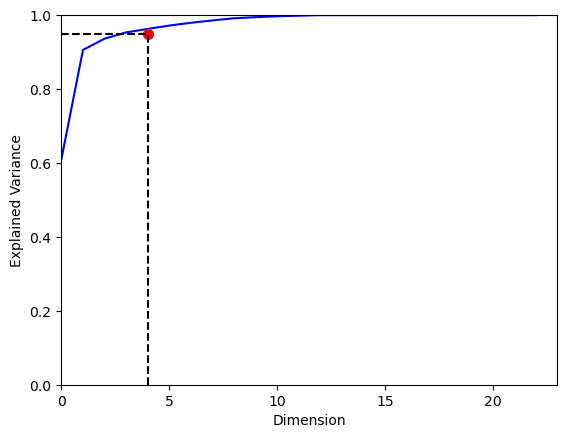

In [13]:
# 주성분과 데이터 투영 분산 정도 시각화
pca_temp = PCA()
pca_temp.fit(input_data)
cumsum = np.cumsum(pca_temp.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1

plt.plot(cumsum, 'b-')
plt.plot(dim, 0.95, 'ro', ms=7)
plt.plot([4.0, 4.0], [0, 0.95], 'k--')
plt.plot([0, 4.0], [0.95, 0.95], 'k--')
plt.axis([0, 23, 0, 1])
plt.xlabel('Dimension')
plt.ylabel('Explained Variance')
plt.show()

In [14]:
print(f'PCA 진행 전 Shape : {input_data.shape}')
print(f'PCA 진행 후 Shape : {input_data_pca.shape}')
print(f'23차원 => 8차원으로 축소됨')

PCA 진행 전 Shape : (30000, 23)
PCA 진행 후 Shape : (30000, 4)
23차원 => 8차원으로 축소됨


In [15]:
input_data_pca = pd.DataFrame(input_data_pca)

In [16]:
data = pd.concat((input_data_pca, target_data), axis=1)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(input_data_pca, target_data,
                                                    test_size=0.2,
                                                    random_state=42)

In [18]:
model = Sequential()

In [19]:
model.add(Dense(100, activation='relu', input_shape=(4,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='categorical_crossentropy',
              metrics='accuracy',
              optimizer='Adam')

In [21]:
model.fit(x_train, y_train, epochs=30, batch_size=100, validation_data=(x_test, y_test))

Epoch 1/30
240/240 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7782 - val_loss: 0.0000e+00 - val_accuracy: 0.7812
Epoch 2/30
240/240 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7782 - val_loss: 0.0000e+00 - val_accuracy: 0.7812
Epoch 3/30
240/240 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7782 - val_loss: 0.0000e+00 - val_accuracy: 0.7812
Epoch 4/30
240/240 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7782 - val_loss: 0.0000e+00 - val_accuracy: 0.7812
Epoch 5/30
240/240 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7782 - val_loss: 0.0000e+00 - val_accuracy: 0.7812
Epoch 6/30
240/240 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7782 - val_loss: 0.0000e+00 - val_accuracy: 0.7812
Epoch 7/30
240/240 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.7

In [22]:
# KerasClassifier로 wrapping
temp_rscv = KerasClassifier(build_fn=model, verbose=0)

In [26]:
import random

nodes = [random.randint(32, 128) for n in range(5)]
L1_values = [random.uniform(0, 0.000001) for n in range(5)]
L2_values = [random.uniform(0, 0.000001) for n in range(5)]
dropout_values = [random.uniform(0, 1) for n in range(5)]
batch_sizes = [random.randint(32, 64) for n in range(5)]
epochs = [random.choice(range(30, 20, 10)) for n in range(5)]

params = dict(nodes=nodes,
              L1_values=L1_values,
              L2_values=L2_values,
              dropout_values=dropout_values,
              batch_size=batch_sizes,
              epochs=epochs
              )

model_best = RandomizedSearchCV(estimator=temp_rscv,
                                param_distributions=params,
                                n_iter=10,
                                cv=3,
                                scoring='accuracy',
                                verbose=1,
                                n_jobs=-1
                                )

In [28]:
model_best.fit(input_data_pca, target_data)

INFO:tensorflow:Assets written to: C:\Users\kry11\AppData\Local\Temp\tmpvh1fc6fy\assets
Fitting 3 folds for each of 10 candidates, totalling 30 fits
INFO:tensorflow:Assets written to: C:\Users\kry11\AppData\Local\Temp\tmpjvvo000d\assets
INFO:tensorflow:Assets written to: C:\Users\kry11\AppData\Local\Temp\tmpryb3tqyn\assets
INFO:tensorflow:Assets written to: C:\Users\kry11\AppData\Local\Temp\tmp_u_f7bm_\assets
INFO:tensorflow:Assets written to: C:\Users\kry11\AppData\Local\Temp\tmp4hqwgd3i\assets
INFO:tensorflow:Assets written to: C:\Users\kry11\AppData\Local\Temp\tmpgh4ij61x\assets
INFO:tensorflow:Assets written to: C:\Users\kry11\AppData\Local\Temp\tmp8ecy42bn\assets
INFO:tensorflow:Assets written to: C:\Users\kry11\AppData\Local\Temp\tmp3niep2l6\assets
INFO:tensorflow:Assets written to: C:\Users\kry11\AppData\Local\Temp\tmpmucov9eu\assets
INFO:tensorflow:Assets written to: C:\Users\kry11\AppData\Local\Temp\tmpbfx8f6l7\assets
INFO:tensorflow:Assets written to: C:\Users\kry11\AppData\L

ValueError: Invalid parameter nodes for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(nodes=91)`
Check the list of available parameters with `estimator.get_params().keys()`